In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [2]:
def plot_scores(scores, head="Mutual Information Scores"):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title(head)

In [3]:
df = pd.read_csv("./data/autos.csv")
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [4]:
X = df.copy()
y = X.pop("price")

In [5]:
X.dtypes

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_of_doors           int64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio      int64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
dtype: object

# Correlation

In [6]:
correlation = df.select_dtypes(exclude="object").corr()

In [7]:
corr = np.abs(correlation['price']).sort_values(ascending=False)

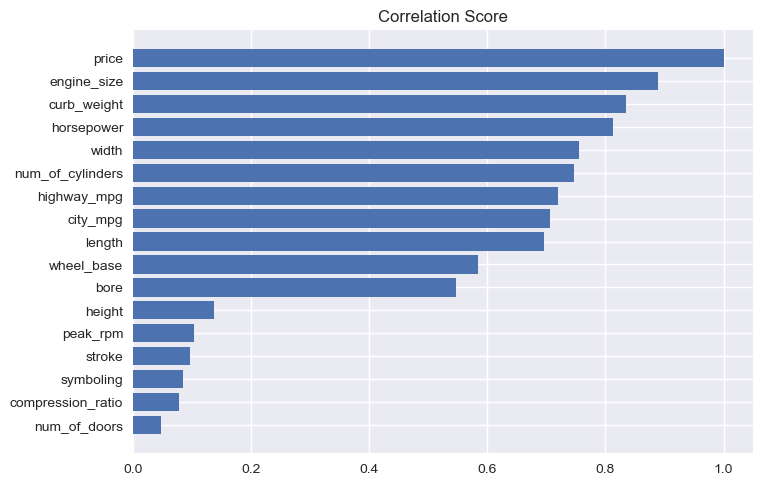

In [8]:
plot_scores(corr, "Correlation Score")

# Mutual Information

In [9]:
X.select_dtypes("object")

,make,fuel_type,aspiration,body_style,drive_wheels,engine_location,engine_type,fuel_system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi
...,...,...,...,...,...,...,...,...
188,volvo,gas,std,sedan,rwd,front,ohc,mpfi
189,volvo,gas,turbo,sedan,rwd,front,ohc,mpfi
190,volvo,gas,std,sedan,rwd,front,ohcv,mpfi
191,volvo,diesel,turbo,sedan,rwd,front,ohc,idi


In [10]:
X['make'].factorize()

(array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
         3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
        15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
        18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
        19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20], dtype=int64),
 Index(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
        'jaguar', 'mazda', 'mercedes-be

In [11]:
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [12]:
X.dtypes

symboling              int64
make                   int64
fuel_type              int64
aspiration             int64
num_of_doors           int64
body_style             int64
drive_wheels           int64
engine_location        int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type            int64
num_of_cylinders       int64
engine_size            int64
fuel_system            int64
bore                 float64
stroke               float64
compression_ratio      int64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
dtype: object

In [13]:
discrete_features = X.dtypes == np.int64

In [14]:
discrete_features

symboling             True
make                  True
fuel_type             True
aspiration            True
num_of_doors          True
body_style            True
drive_wheels          True
engine_location       True
wheel_base           False
length               False
width                False
height               False
curb_weight           True
engine_type           True
num_of_cylinders      True
engine_size           True
fuel_system           True
bore                 False
stroke               False
compression_ratio     True
horsepower            True
peak_rpm              True
city_mpg              True
highway_mpg           True
dtype: bool

In [15]:
from sklearn.feature_selection import mutual_info_regression

In [16]:
def make_mi_scores(X, y, discrete_features, seed=42):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=seed)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [17]:
mi_scores = make_mi_scores(X, y, discrete_features)

In [18]:
mi_scores

curb_weight          1.538375
horsepower           1.267362
engine_size          1.005638
highway_mpg          0.959602
city_mpg             0.861466
width                0.693454
length               0.610294
wheel_base           0.582346
make                 0.545467
bore                 0.489095
fuel_system          0.483995
peak_rpm             0.449831
stroke               0.388527
height               0.369088
drive_wheels         0.332448
num_of_cylinders     0.331445
symboling            0.229537
engine_type          0.150524
compression_ratio    0.132770
aspiration           0.087755
body_style           0.079388
fuel_type            0.047279
engine_location      0.036912
num_of_doors         0.011409
Name: MI Scores, dtype: float64

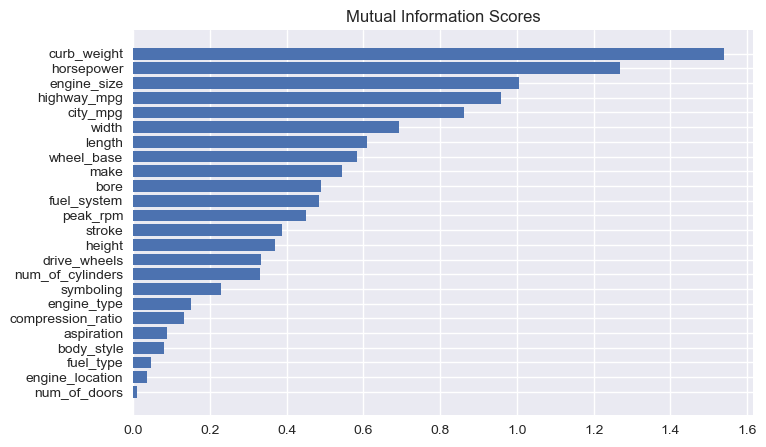

In [19]:
plt.figure(dpi=100, figsize=(8, 5))
plot_scores(mi_scores)

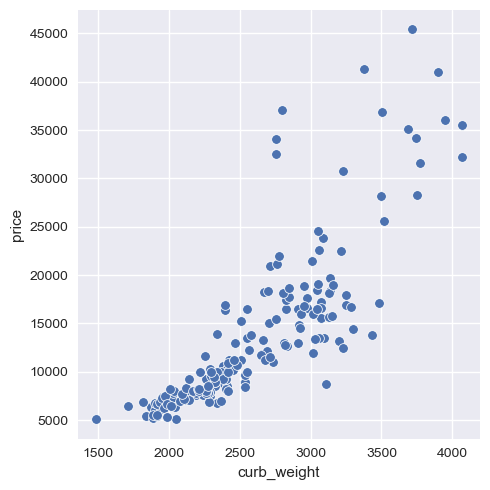

In [20]:
sns.relplot(x="curb_weight", y="price", data=df);